### Importing libraries

In [25]:
import numpy as np
import pandas as pd 


from sklearn.model_selection import train_test_split  # Helping you divide your datasets to train/test(validation)
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import model_selection


import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Increase the default plot size
#from pylab import rcParams
#rcParams['figure.figsize']= 5, 4

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
sns.set()

 


### Loading Dataset

In [26]:
df= pd.read_csv("customer_churn.csv")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [27]:
df.columns=['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn']

In [28]:
# check attributes names and datatypes using info()
df.info()    
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Intl Plan         3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


(3333, 21)

### Observations:
<list>
    1. This dataset contains 3333 samples and 21 attributes.(8 integer, 8 float, and 5 objects)
    2. No variable column has null/missing values.

n the given dataset, we have two types of customers one who is likely to be loyal and another who is likely to be disloyal . So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [29]:
df.groupby('Churn').mean()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Churn,,,,,,,,,,,,,,,,
False.,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True.,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [30]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


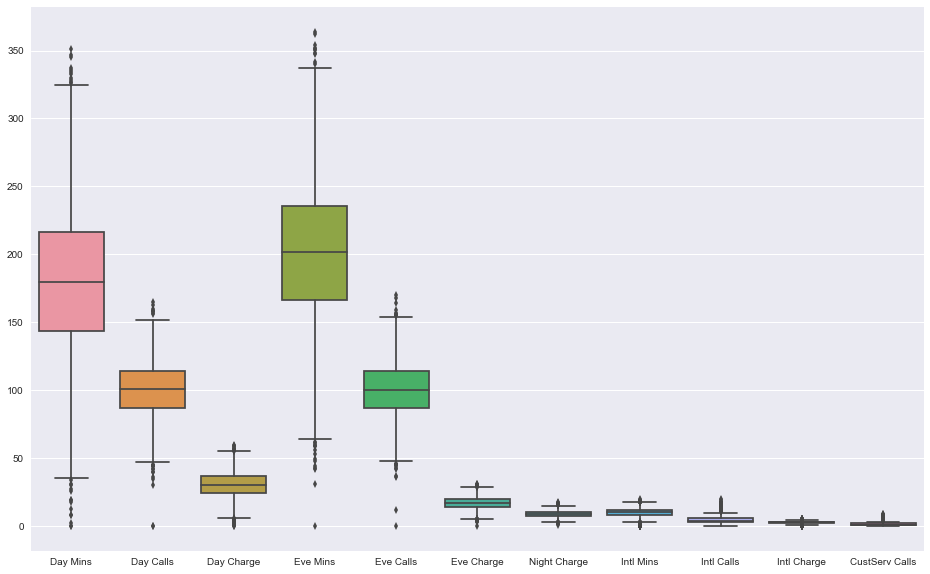

In [34]:
features=[ 'Day Mins', 'Day Calls', 'Day Charge','Eve Mins', 'Eve Calls', 'Eve Charge','Night Charge', 
          'Intl Mins', 'Intl Calls', 'Intl Charge','CustServ Calls']
_, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(data=df[features], ax=ax);

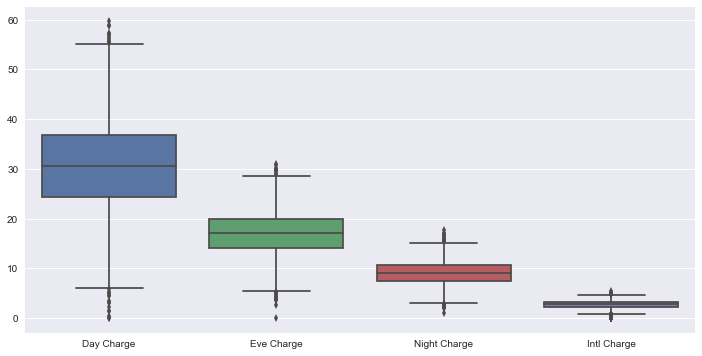

In [32]:
features=[ 'Day Charge', 'Eve Charge','Night Charge', 
         'Intl Charge']
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[features], ax=ax);


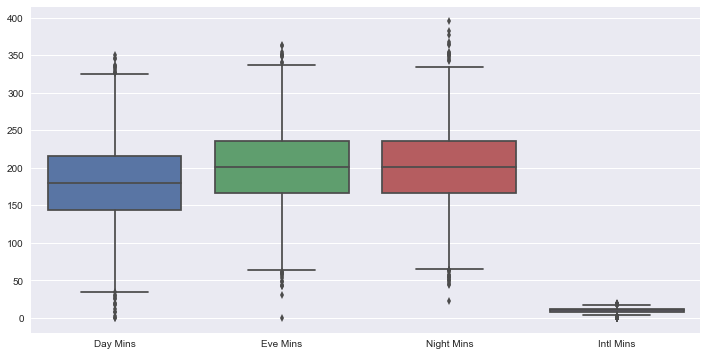

In [33]:
features=[ 'Day Mins','Eve Mins','Night Mins', 
          'Intl Mins']
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[features], ax=ax);

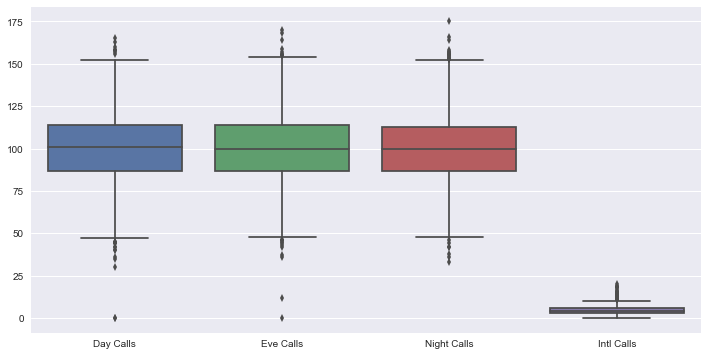

In [12]:
features=[  'Day Calls' ,'Eve Calls','Night Calls', 'Intl Calls']
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[features], ax=ax);

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th (Q1) and 75th (Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR, Q3+1.5⋅IQR), where IQR=Q3−Q1 is the interquartile range.

Outliers that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can also see that a large number of international mins,customer service calls are quite min/low in our data.

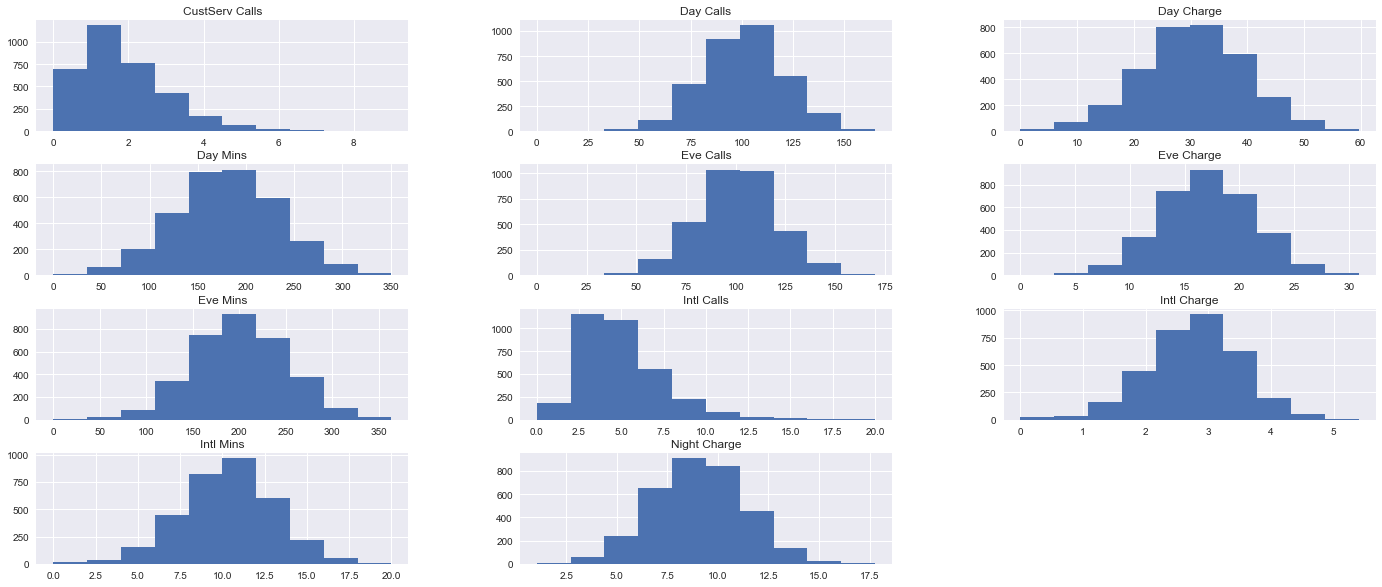

In [35]:
features=[ 'Day Mins', 'Day Calls', 'Day Charge','Eve Mins', 'Eve Calls', 'Eve Charge','Night Charge', 
          'Intl Mins', 'Intl Calls', 'Intl Charge','CustServ Calls']
df[features].hist(figsize=(24, 10));

In the above plot, we see that the variable day minutes, Night mins, Intl mins and Eve mins are normally distributed, while  intl calls is prominently skewed right (its tail is longer on the right). It more clear from the density plot .

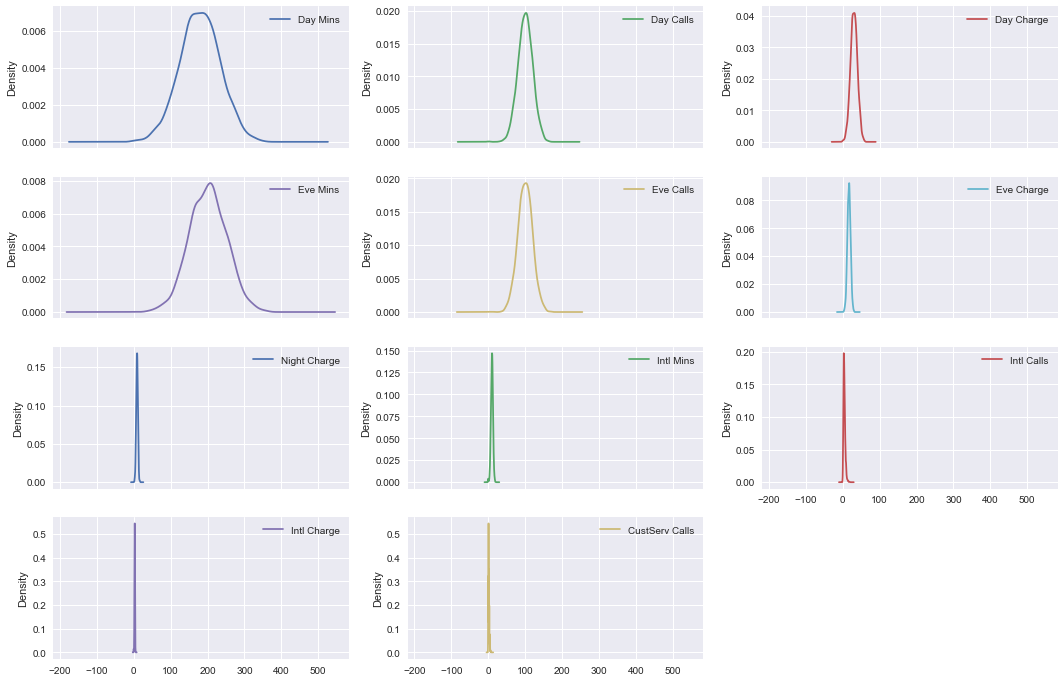

In [36]:
df[features].plot(kind='density', subplots=True, 
                  layout=(4, 3), sharex=True, figsize=(18, 12));

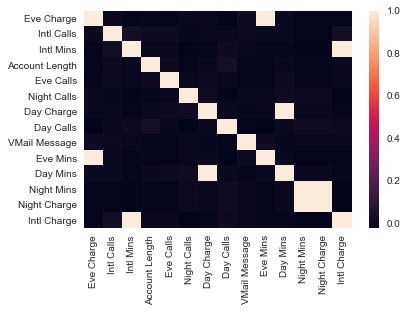

In [37]:
# Drop non-numerical variables
numerical_var = list(set(df.columns) - 
                 set(['State', 'Intl plan', 
                      'VMail Plan', 'Area Code', 'Churn',
                      'CustServ Calls']))
# Calculate and plot
corr_matrix = df[numerical_var].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as 'Day Charge','Night Charge','Eve Charge' and 'Intl charge'  that have been calculated directly from the number of minutes spent on phone calls (Day Mins,night mins,evening minutes, international minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. We can drop them in our analysis

### Feature Selection
   I assume that the phone-number of the client or geographical information about the client are not going to be useful for the prediction. 

In [38]:
df=df.drop(['Day Charge', 'Eve Charge','Night Charge', 'Intl Charge','State','Area Code','Phone'],axis=1)

### Initializing and training a classifier
####  Converting categorical data into numbers with Pandas

In [39]:
df.replace({'Churn': {'False.': 0, 'True.': 1}}, inplace=True)
df.replace({'Intl Plan': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'VMail Plan': {'no': 0, 'yes': 1}}, inplace=True)

In [40]:
 
train, test = train_test_split(df, test_size = 0.25)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')


965     0
1463    0
491     1
2902    0
1252    0
976     0
3332    0
1447    0
58      0
3163    0
278     0
246     0
1197    0
749     0
1154    0
3176    0
1145    0
349     1
402     0
2268    0
1904    1
2451    1
2596    0
1765    1
1359    1
1937    0
709     0
2632    0
1297    0
1578    0
       ..
1893    1
2360    0
1084    0
1328    0
3077    0
474     0
2449    0
1257    0
2202    0
2986    0
1879    0
2131    0
945     0
668     0
589     0
2465    0
1565    0
2182    0
2100    0
2387    1
2127    0
2222    0
7       0
993     0
2209    0
2293    0
500     0
1516    1
916     0
640     0
Name: Churn, Length: 2499, dtype: int64

2949    0
1594    0
1234    0
2915    0
3271    0
664     0
388     0
1268    0
2831    0
2239    0
2092    0
1579    0
330     0
3037    0
1149    0
1277    0
3142    0
1944    0
1007    0
1326    0
2048    0
1738    0
180     0
888     0
1052    0
336     0
493     0
1903    1
260     0
3253    0
       ..
1388    0
33      1
1665    0
790     0
1185    0
3146    0
498     1
1670    0
2121    0
1358    0
2633    0
1725    0
1168    0
815     1
1289    0
1553    0
1095    0
2101    0
3070    1
1932    0
1584    0
909     0
240     0
2591    1
1587    0
1254    1
2370    0
301     1
3026    0
648     0
Name: Churn, Length: 834, dtype: int64

### Outliers with linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<Figure size 720x720 with 0 Axes>

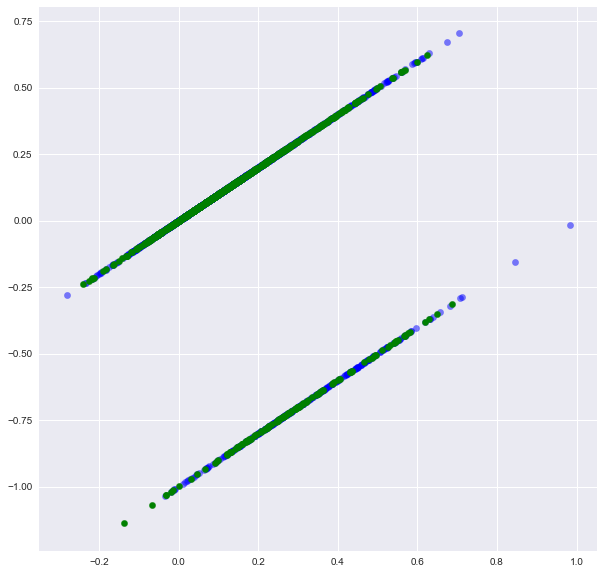

In [41]:
from sklearn import linear_model
from sklearn import metrics

lin = linear_model.LinearRegression()

lin.fit(train_x, train_y)
y_train_predict = lin.predict(train_x)
y_test_predict = lin.predict(test_x)

plt.figure(figsize=(10, 10))
plt.scatter(y_train_predict, y_train_predict - train_y, c='b', s=40, alpha=0.5)
plt.scatter(y_test_predict, y_test_predict - test_y, c = 'g', s=40)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Intercept: [-5.19794889]
Regression: [[-8.37559125e-04  2.02206467e+00 -1.56590413e+00  2.09781512e-02
   1.11465903e-02 -1.85947764e-03  4.13328518e-03 -3.77700272e-03
   1.76429538e-03 -6.87650639e-03  6.78561710e-02 -6.99430117e-02
   5.00273156e-01]]
Accuracy of logistic regression classifier on test set: 0.85
             precision    recall  f1-score   support

          0       0.86      0.98      0.92       700
          1       0.59      0.17      0.27       134

avg / total       0.82      0.85      0.81       834



[Text(0,0.5,'No churn'), Text(0,1.5,'Churn')]

[Text(0.5,0,'No churn'), Text(1.5,0,'Churn')]

Text(34,0.5,'True label')

Text(0.5,16,'Predicted label')

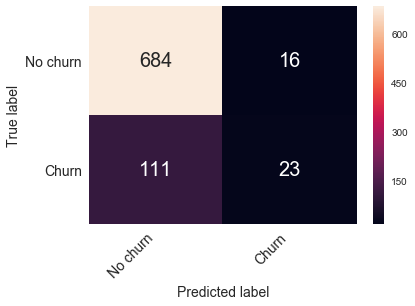

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)

test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

We got 86% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

It is also important to look at the distribution of how many customers churn. If 95% of customers don’t churn, we can achieve 95% accuracy by building a model that simply predicts that all customers won’t churn. But this isn’t a very useful model, because it will never tell us when a customer will churn, which is what we are really interested in.

In [43]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

The class for churn is only around 25% of the total population of samples. There is a real risk that a model trained on this data may only make too many predictions in favour of the majority class. 

o balance the data set, we can randomly duplicate observations from the minority class. This is also known as re sampling with replacement:

### Creating Naive Bayes Model 

#### Initializing classifiers and divide the to train/test(validation)

In [146]:
clf = GaussianNB()
array = df.values
X = array[:,0:13] # Features/Independent Variables  all rows from clolumn 1 to 4
Y = array[:,13] # Response/Class Variable
print(X)
print(Y)
# One-third of data as a part of test set
validation_size = 0.3

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)

[[128.    0.    1.  ...  10.    3.    1. ]
 [107.    0.    1.  ...  13.7   3.    1. ]
 [137.    0.    0.  ...  12.2   5.    0. ]
 ...
 [ 28.    0.    0.  ...  14.1   6.    2. ]
 [184.    1.    0.  ...   5.   10.    2. ]
 [ 74.    0.    1.  ...  13.7   4.    0. ]]
[0. 0. 0. ... 0. 0. 0.]
1000
2333


### Setting up classifier parameters, evaluation metric, and train and test (validate) it

In [148]:
# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
clf.fit(X_train, Y_train) #for the gaussian classifier

#Predicting for the Test(Validation) Set
pred_clf = clf.predict(X_validation)

GaussianNB(priors=None)

### Prediction probabilities

In [149]:
#Prediction Probability
# predict_proba is a method of a classifier 
# outputting the probability of the instance being in each of the classes.
prob_pos_clf = clf.predict_proba(X_validation)[:, :]
print (Y_validation)
print(prob_pos_clf)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Performance Evaluation and Model Selection Using Cross Validation

In [151]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)



NB accuracy: 0.851684 (0.018299)
